In [63]:
import sys
import os

import pandas as pd

sys.path.append(os.path.abspath("../Codes"))

from Integration.composite_integration import simpson_trapezoidal
from Integration.Romberg_integration import romberg

#Run both functions
sim_res,trap_res,main_res,err_s,err_t=simpson_trapezoidal("sin(x)",a1="0",b1="pi",n=2,n1=2,main_val=True,error_s=True,error_t=True)
rom_res,main_res,err_r=romberg("sin(x)",a1="0",b1="pi",n=2,main_val=True,return_error=True)
print(sim_res,trap_res,rom_res,main_res)
print(err_s,err_t,err_r)

2.0943951023931953 1.5707963267948966 1.480960979386122 2.0
0.09439510239319526 0.42920367320510344 0.519039020613878


Let's see if the errors get lower for larger n's or not.

In [64]:
#solutions in multiple n
import numpy as np
import pandas as pd
k=np.array([2,4,6,8,10,14])
n=len(k)
s_r=np.zeros(n+1,dtype=float)
t_r=s_r.copy()
r_r=s_r.copy()
er_s=s_r.copy()
er_t=s_r.copy()
er_r=s_r.copy()
main_res=s_r.copy()
for i in range(n+1):
    s_r[i],t_r[i],main_res[i],er_s[i],er_t[i]=simpson_trapezoidal("sin(x)",a1="0",b1="pi",n=k[i-1],n1=k[i-1],main_val=True,error_s=True,error_t=True)
    r_r[i],main_res1,er_r[i]=romberg("sin(x)",a1="0",b1="pi",n=k[i-1],main_val=True,return_error=True)

data=[[a,b,c,d,e,f,g,h] for a,b,c,d,e,f,g,h in zip(k,main_res,s_r,er_s,t_r,er_t,r_r,er_r)]
df=pd.DataFrame(data,columns=['n',"Exact solution","Simpson's solution","Error in Simpson's","Trapezoidal's solution","Error in Trapezoidal's","Romberg's solution","Error in Romberg's"])
display(df)

,n,Exact solution,Simpson's solution,Error in Simpson's,Trapezoidal's solution,Error in Trapezoidal's,Romberg's solution,Error in Romberg's
0,2,2.0,2.000028,0.000028,1.991600,0.008400,1.999883,0.000117
1,4,2.0,2.094395,0.094395,1.570796,0.429204,1.480961,0.519039
2,6,2.0,2.004560,0.004560,1.896119,0.103881,1.879766,0.120234
3,8,2.0,2.000863,0.000863,1.954097,0.045903,1.970089,0.029911
4,10,2.0,2.000269,0.000269,1.974232,0.025768,1.992524,0.007476
5,14,2.0,2.000110,0.000110,1.983524,0.016476,1.998131,0.001869


For larger step size n, Simpson's method gave nearly 1e-4 accuracy. Romberg's method gave 1e-3 accuracy. Whereas, Trapezoidal rule gave 1e-2.
Let's see the plot of n vs errors.

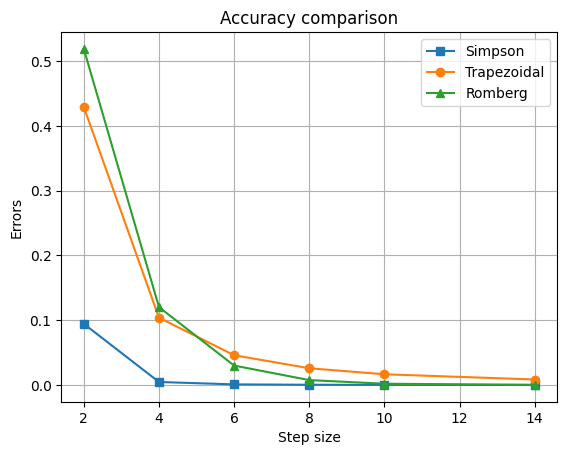

In [65]:
import matplotlib.pyplot as plt

plt.plot(k, er_s[1:], marker='s', label="Simpson")
plt.plot(k, er_t[1:], marker='o', label="Trapezoidal")
plt.plot(k, er_r[1:], marker='^', label="Romberg")
plt.title("Accuracy comparison")
plt.xlabel("Step size")
plt.ylabel("Errors")
plt.grid(True)
plt.legend()
plt.show()